<a href="https://colab.research.google.com/github/Sambaran04/Tensorflow/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

In this notebook we're going to learn how to write neural networks for classificatio problem.

A classification is where you try to classify
something as one thing or another

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples =1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# X = tf.cast(X, tf.float32)
# y = tf.cast(y, tf.float32)

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X":X[:,1], "label":y})
circles

,X0,X,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


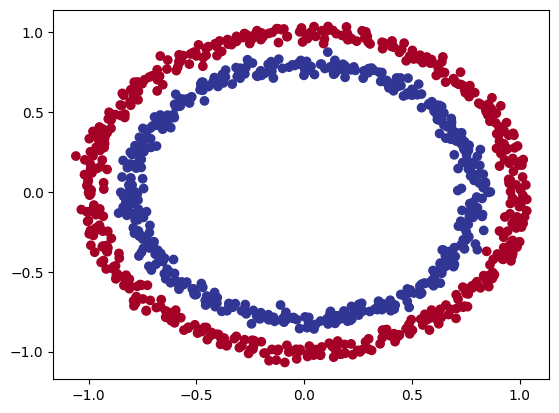

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input & Output Shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## Improving our model

Let's look into our bag of trics to see how we can improve our model.
  1. Create a model- we might to add more layers or increase the number of hidden units within a layer.
  2. Compiling a model- here we might to choose a different optimization function such as Adam instead of SGD.
  3. Fitting a model- perhaps we might fit our model for more epochs (leave it training for longer).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5050


[0.6960794925689697, 0.5049999952316284]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (Where each unique class falls)

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() +0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi class
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
  else:
    print("Doing binary classificaion")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
Doing binary classificaion


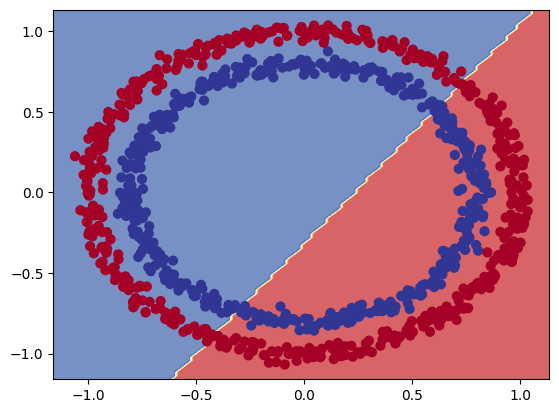

In [14]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [15]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_2.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100, verbose=0)
model_3.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 3ms/step - loss: 38.3807 - mae: 38.3807


[38.3807258605957, 38.3807258605957]

2/2 [==============================] - 0s 5ms/step


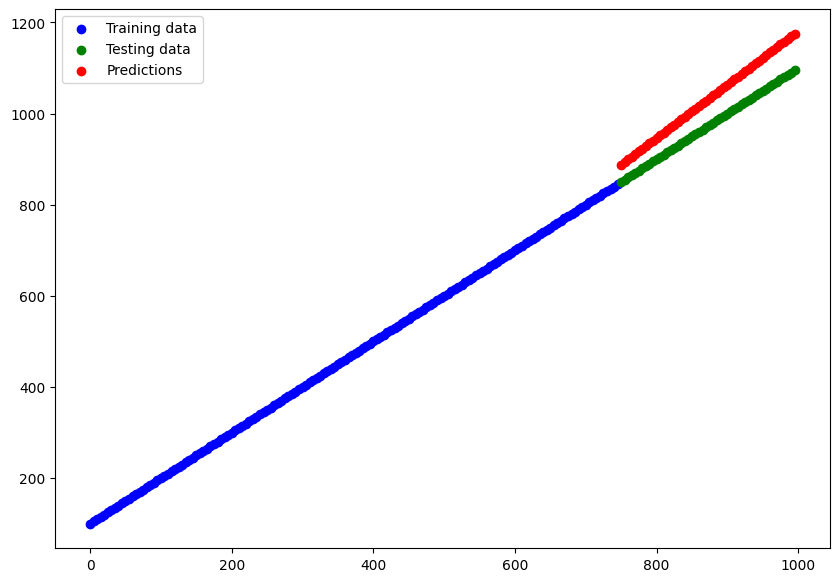

In [17]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Linearity

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

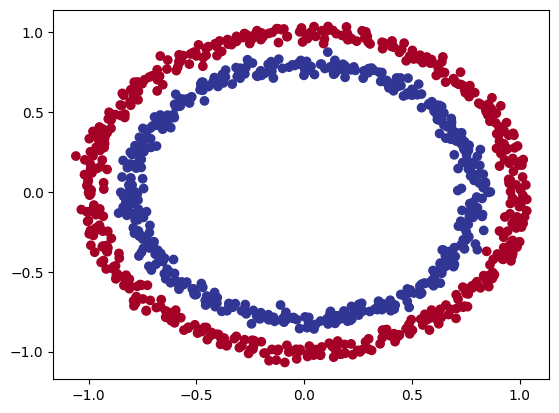

In [19]:
# Check out our data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classificaion


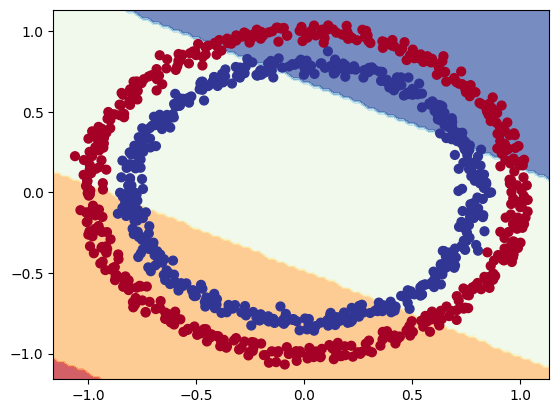

In [20]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


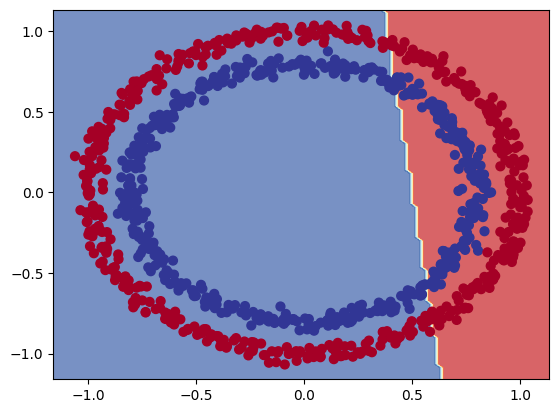

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),# can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=200, verbose=0)
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000


[0.6994092464447021, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


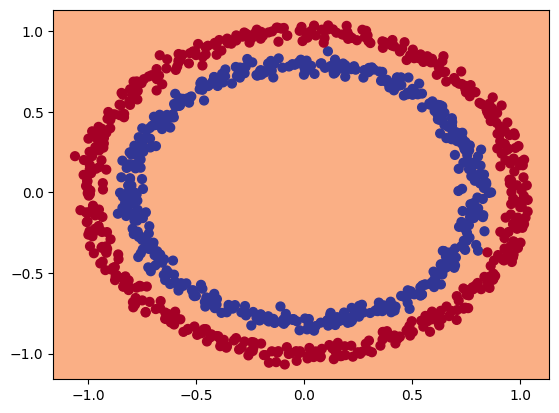

In [24]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.9040


[0.3136783540248871, 0.9039999842643738]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


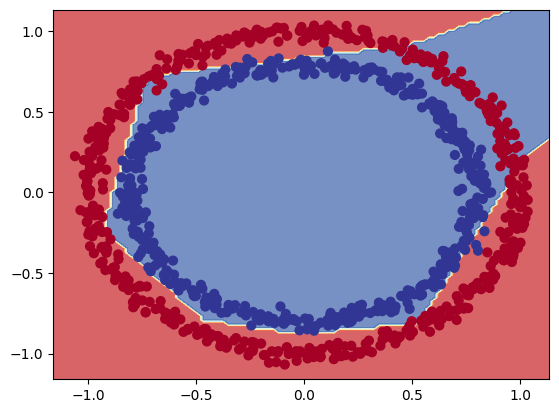

In [26]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set

In [27]:
# Check how many examples we have
len(X)

1000

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [30]:
# Let's recreate a model to fit on the trainiing data and evaluate on the testing data

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=500, verbose=0)
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9950


[0.014831643551588058, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion
313/313 [==============================] - 0s 1ms/step
Doing binary classificaion


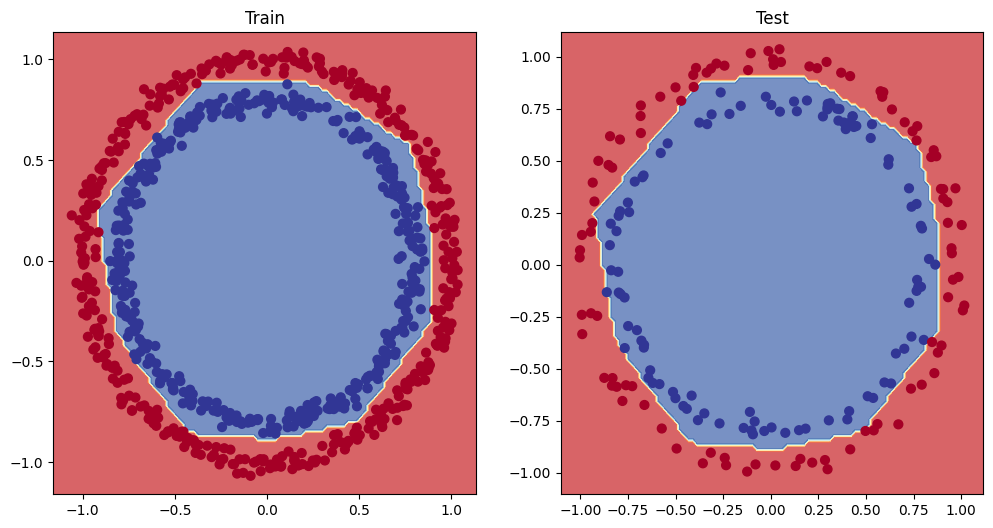

In [31]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your model while it's training
* Another model (We Could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [32]:
# Let's recreate a model to fit on the trainiing data and evaluate on the testing data

# Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model (passing lr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9552 - accuracy: 0.5000


[0.955202043056488, 0.5]

<Axes: xlabel='epochs'>

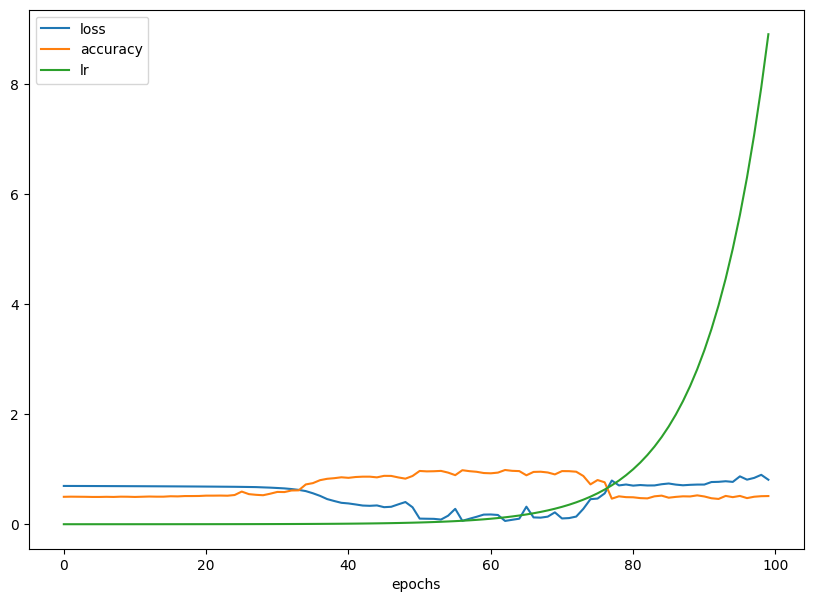

In [33]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

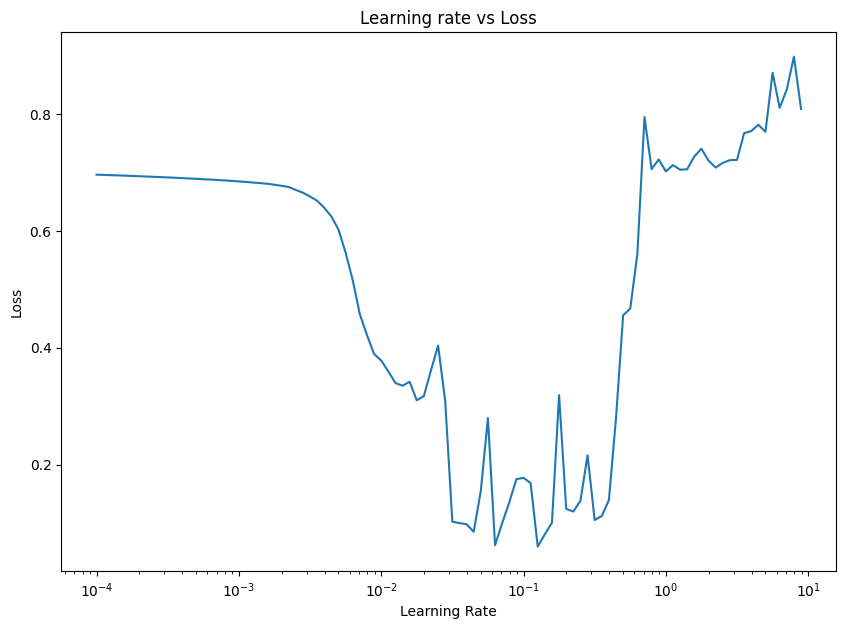

In [34]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [35]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [36]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)
# Create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.2),
                metrics=['accuracy'])
# Create a learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model (passing lr_scheduler callback)
history = model_10.fit(X_train, y_train, epochs=300, verbose=0)
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 1.0000


[0.02466464228928089, 1.0]

313/313 [==============================] - 0s 1ms/step
Doing binary classificaion
313/313 [==============================] - 0s 1ms/step
Doing binary classificaion


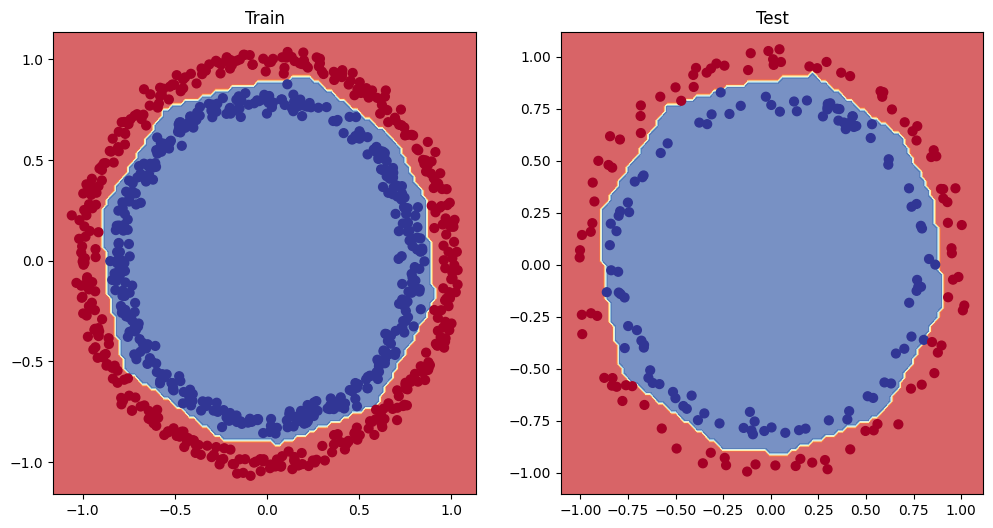

In [37]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

## More classificaiton evaluation methods

Alongside visualizing our models results a much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report (from sklearn)

In [38]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 1.0000
Model loss on the test set: 0.02
Model accuracy on the test set: 100.00%


In [39]:
# y_preds[:10]

In [40]:
 # Create a confusion matrix
from sklearn.metrics import confusion_matrix

 # Make predictions
y_preds = model_10.predict(X_test)

# Convert prediction probabilities to binary format and view the first 10
# y_preds = tf.round(y_preds)[:10]

 # Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]])

How about we prettif our confusion matrix?

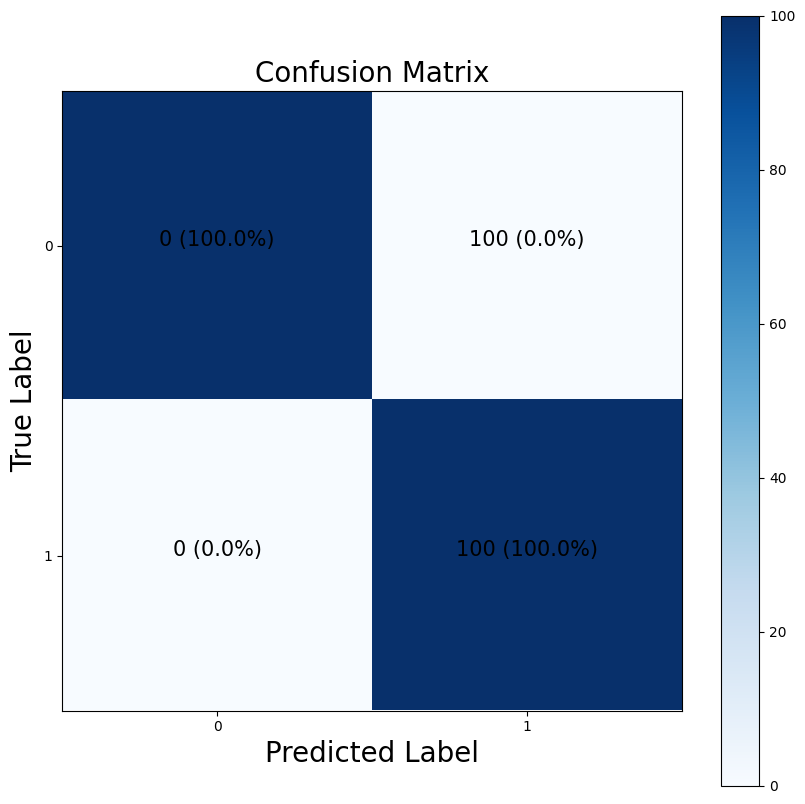

In [41]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion Matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjst label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max()+cm.min())

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[1, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color = 'white' if cm[i, j]>threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more that two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.
To practice multi-class classification, we're going to build a neural network to classify images of different items

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [43]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [44]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

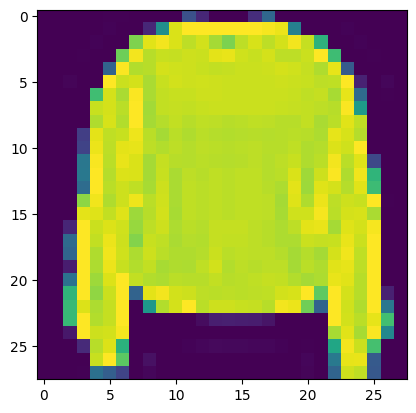

In [45]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [46]:
# Check out sample label
train_labels[7]

2

In [47]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

In [48]:
# Will start from tomorrow

Text(0.5, 1.0, 'Trouser')

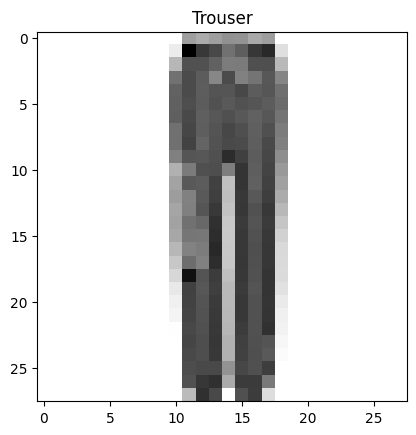

In [49]:
# Plot an example image and its label
index_of_choice=1000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

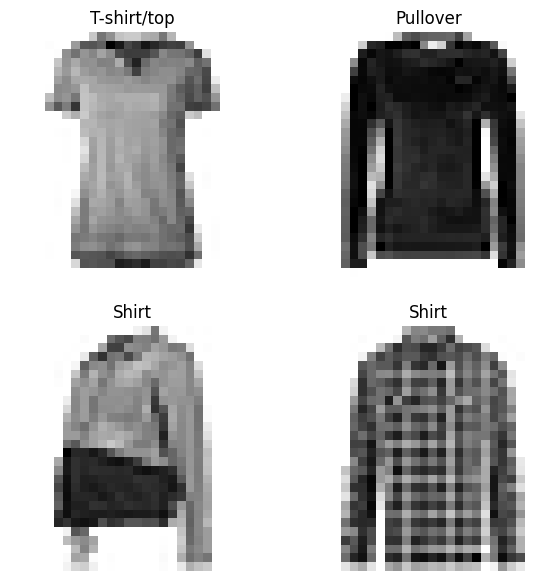

In [52]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape= 28 x 28 (the shape of one image)
* Output shape= 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
  * If our labels are one-hot encoded, use CategoricalCrosstentropy
  * If our labels are not one-hot encoded, use SparseCategoricalCrosstentropy
* Output layer activation = Softmax (not sigmoid)

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])

# Fit the model
non_norm_history= model_11.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 2.1114 - accuracy: 0.1935 - val_loss: 1.8696 - val_accuracy: 0.2215
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7064 - accuracy: 0.2740 - val_loss: 1.5951 - val_accuracy: 0.2999
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5360 - accuracy: 0.3343 - val_loss: 1.5076 - val_accuracy: 0.3490
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4775 - accuracy: 0.3546 - val_loss: 1.4932 - val_accuracy: 0.3630
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4380 - accuracy: 0.3686 - val_loss: 1.4227 - val_accuracy: 0.3763
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3900 - accuracy: 0.3968 - val_loss: 1.4066 - val_accuracy: 0.4102
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3574 - accuracy: 0.4150 - val_loss: 1.3601 - val_accu

In [69]:
# Check model sammary
model_11.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 4)                 3140      
                                                                 
 dense_56 (Dense)            (None, 4)                 20        
                                                                 
 dense_57 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model_11.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 1.2418 - accuracy: 0.4802


[1.241773009300232, 0.48019999265670776]

In [71]:
# Check the min adn max malues of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [72]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [76]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])

# Fit the model
norm_history= model_12.fit(train_data_norm,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4315 - accuracy: 0.4692 - val_loss: 1.1118 - val_accuracy: 0.5975
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0071 - accuracy: 0.6235 - val_loss: 0.9715 - val_accuracy: 0.6424
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8955 - accuracy: 0.6633 - val_loss: 0.8807 - val_accuracy: 0.6685
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8335 - accuracy: 0.6827 - val_loss: 0.8480 - val_accuracy: 0.6748
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8057 - accuracy: 0.6861 - val_loss: 0.8292 - val_accuracy: 0.6870
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7877 - accuracy: 0.6912 - val_loss: 0.8227 - val_accuracy: 0.6828
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7757 - accuracy: 0.6948 - val_loss: 0.8051 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

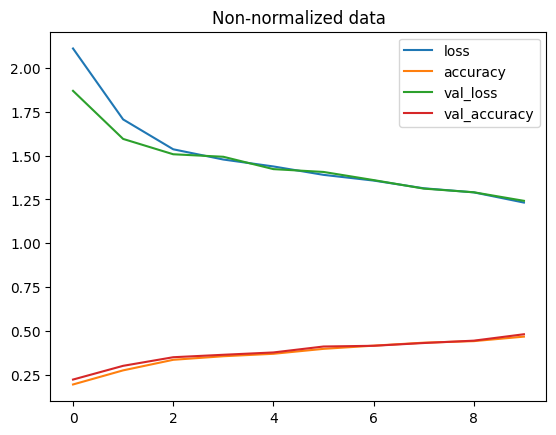

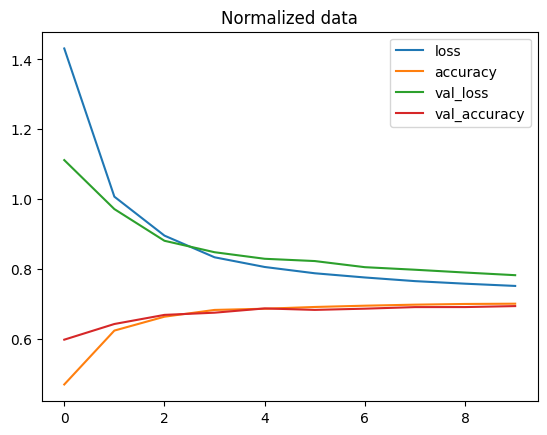

In [80]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history= model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1613 - accuracy: 0.6261 - val_loss: 121.0655 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6876 - accuracy: 0.7792 - val_loss: 161.3364 - val_accuracy: 0.6234 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6121 - accuracy: 0.7913 - val_loss: 131.6702 - val_accuracy: 0.6554 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5784 - accuracy: 0.8008 - val_loss: 122.6819 - val_accuracy: 0.7011 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5625 - accuracy: 0.8049 - val_loss: 131.2338 - val_accuracy: 0.7091 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5530 - accuracy: 0.8086 - val_loss: 126.1447 - val_accuracy: 0.7193 - lr: 0.0018
Epoch 7/40
1875/1875 [=======================

Text(0.5, 1.0, 'Finding the ideal learning rate')

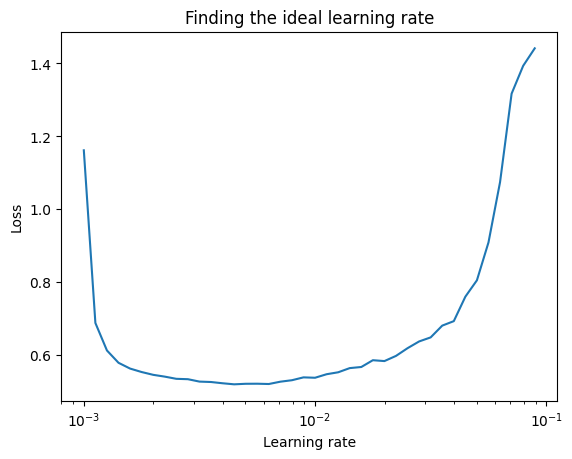

In [83]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(lr=0.001),
                 metrics= ["accuracy"])

# Create the learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_14= model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0428 - accuracy: 0.6388 - val_loss: 96.5746 - val_accuracy: 0.6934
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6261 - accuracy: 0.7908 - val_loss: 112.7549 - val_accuracy: 0.7196
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5686 - accuracy: 0.8037 - val_loss: 131.0408 - val_accuracy: 0.6958
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5463 - accuracy: 0.8109 - val_loss: 133.3229 - val_accuracy: 0.7167
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5332 - accuracy: 0.8138 - val_loss: 139.7888 - val_accuracy: 0.7156
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5237 - accuracy: 0.8164 - val_loss: 134.7778 - val_accuracy: 0.7055
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5177 - accuracy: 0.8187 - val_loss: 144.9406 -

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evalueate its performance using other classification metrics (Such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [85]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion Matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjst label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max()+cm.min())

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[1, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color = 'white' if cm[i, j]>threshold else "black",
            size=text_size)

In [86]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[4.7553019e-09, 8.7644047e-08, 2.9896012e-06, 1.7647915e-08,
        4.0601801e-08, 2.4668744e-01, 3.0570110e-10, 4.2715453e-02,
        1.0441478e-02, 7.0015252e-01],
       [1.1625822e-05, 2.7639649e-04, 9.5677435e-01, 1.2023124e-06,
        3.0163990e-02, 2.2331401e-09, 1.1508840e-02, 2.5138279e-14,
        1.2635124e-03, 3.7883412e-11],
       [1.7922360e-08, 9.9964011e-01, 9.4052812e-06, 3.1214944e-04,
        3.6559065e-06, 1.8010232e-07, 3.6992356e-09, 1.8182375e-13,
        2.3611543e-11, 3.4384557e-05],
       [4.5496763e-11, 9.9994403e-01, 1.7610462e-07, 4.5234981e-05,
        1.5202116e-07, 5.1433835e-09, 6.2598663e-12, 8.8301610e-17,
        1.7403305e-14, 1.0404680e-05],
       [1.7526101e-01, 8.7950807e-03, 2.6669940e-01, 5.3088747e-02,
        5.3827278e-02, 7.5776264e-04, 4.2950368e-01, 1.1692200e-06,
        1.2063116e-02, 2.8187408e-06]], dtype=float32)

In [91]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

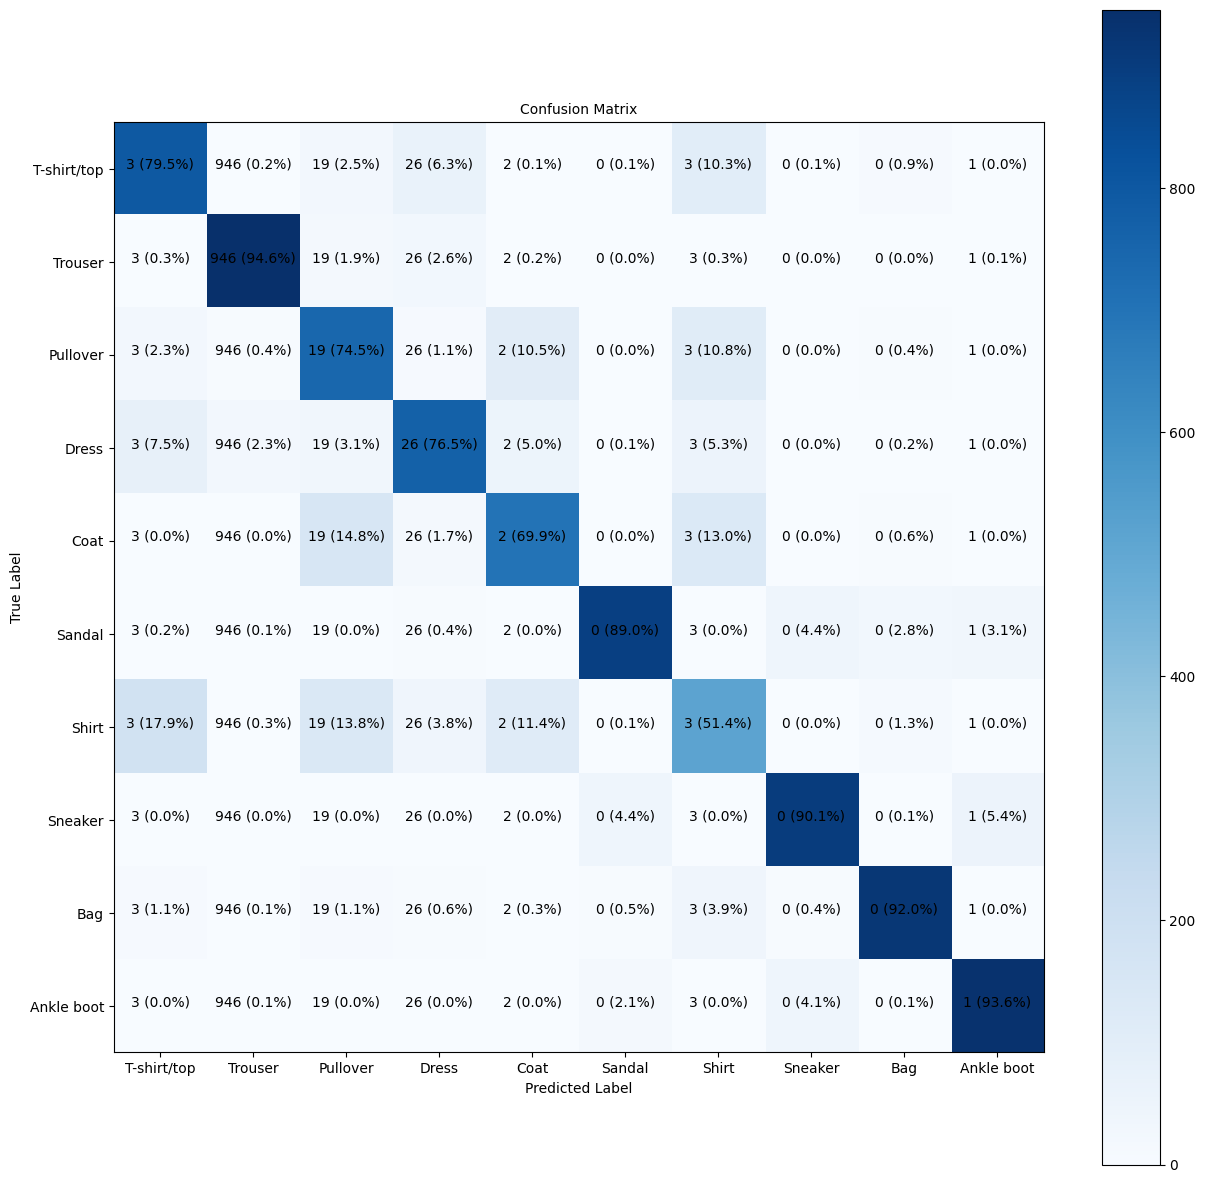

In [93]:
# Let's make a good confusion Matrix
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(15, 15), text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/ true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color) # Set the color to green or red based on if prediciton is right or wrong